In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import shutil

In [2]:
def create_directory_for_results(path, dir_name):
    """
    Create folder for results.

    Parameters:
    - path (str): The base path for creating the directory.
    - dir_name (str): The name of the directory to be created.

    Returns:
    - str: The path of the created directory.
    """

    path = f'{path}{dir_name}/'

    if os.path.isdir(path):
        shutil.rmtree(path)

    os.mkdir(path)

    return path

In [3]:
DIR_NAME = 'Features_PoC'

DATA_PATH_CLUSTERED = f'../../../Results/Generating_Features/FoI_Xy_PoC/'
OUTPUT_PATH = f'../../../Results/Analysis/'

OUTPUT_PATH = create_directory_for_results(OUTPUT_PATH, DIR_NAME)

In [4]:
CSV_names = np.asarray(os.listdir(DATA_PATH_CLUSTERED))

X = pd.DataFrame()

for i, current_csv_name in enumerate(CSV_names):
    X = pd.concat([X, pd.read_csv(f'{DATA_PATH_CLUSTERED}{current_csv_name}')], axis=0)
    break

y = X['target']
X = X.drop(['target'], axis=1)

In [5]:
n_features = len(X.columns)
features_names = X.columns

In [6]:
X

,RGB_R,RGB_G,RGB_B,Lab_L,Lab_A,Lab_B,HSV_H,HSV_S,HSV_V,YCrCb_Y,...,erosion_B,dilation_R,dilation_G,dilation_B,S_wb_R,S_wb_G,S_wb_B,GW_wb_R,GW_wb_G,GW_wb_B
0,0.905882,0.858824,0.745098,0.878431,0.498039,0.564706,0.082353,0.176471,0.905882,0.858824,...,0.705882,0.909804,0.862745,0.760784,0.831373,0.749020,0.584314,0.756863,0.741177,0.745098
1,0.874510,0.839216,0.741177,0.858824,0.498039,0.552941,0.086275,0.152941,0.874510,0.839216,...,0.705882,0.909804,0.862745,0.760784,0.776471,0.713726,0.568627,0.729412,0.721569,0.741177
2,0.878431,0.835294,0.705882,0.854902,0.498039,0.572549,0.090196,0.196078,0.878431,0.835294,...,0.705882,0.909804,0.862745,0.760784,0.784314,0.705882,0.415686,0.733333,0.717647,0.705882
3,0.878431,0.835294,0.733333,0.854902,0.501961,0.556863,0.082353,0.164706,0.878431,0.835294,...,0.705882,0.878431,0.843137,0.745098,0.784314,0.705882,0.533333,0.733333,0.717647,0.733333
4,0.874510,0.835294,0.729412,0.854902,0.498039,0.560784,0.086275,0.164706,0.874510,0.835294,...,0.705882,0.878431,0.843137,0.745098,0.776471,0.705882,0.517647,0.729412,0.717647,0.729412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1.000000,1.000000,0.843137,0.992157,0.478431,0.576471,0.117647,0.156863,1.000000,0.980392,...,0.815686,1.000000,1.000000,0.843137,0.992157,1.000000,1.000000,0.835294,0.862745,0.843137
249996,1.000000,1.000000,0.839216,0.992157,0.474510,0.580392,0.117647,0.160784,1.000000,0.980392,...,0.815686,1.000000,1.000000,0.843137,0.992157,1.000000,1.000000,0.835294,0.862745,0.839216
249997,1.000000,1.000000,0.839216,0.992157,0.474510,0.580392,0.117647,0.160784,1.000000,0.980392,...,0.815686,1.000000,1.000000,0.843137,0.992157,1.000000,1.000000,0.835294,0.862745,0.839216
249998,0.984314,0.972549,0.815686,0.968627,0.482353,0.580392,0.109804,0.172549,0.984314,0.956863,...,0.815686,1.000000,1.000000,0.843137,0.964706,0.956863,0.898039,0.819608,0.839216,0.815686


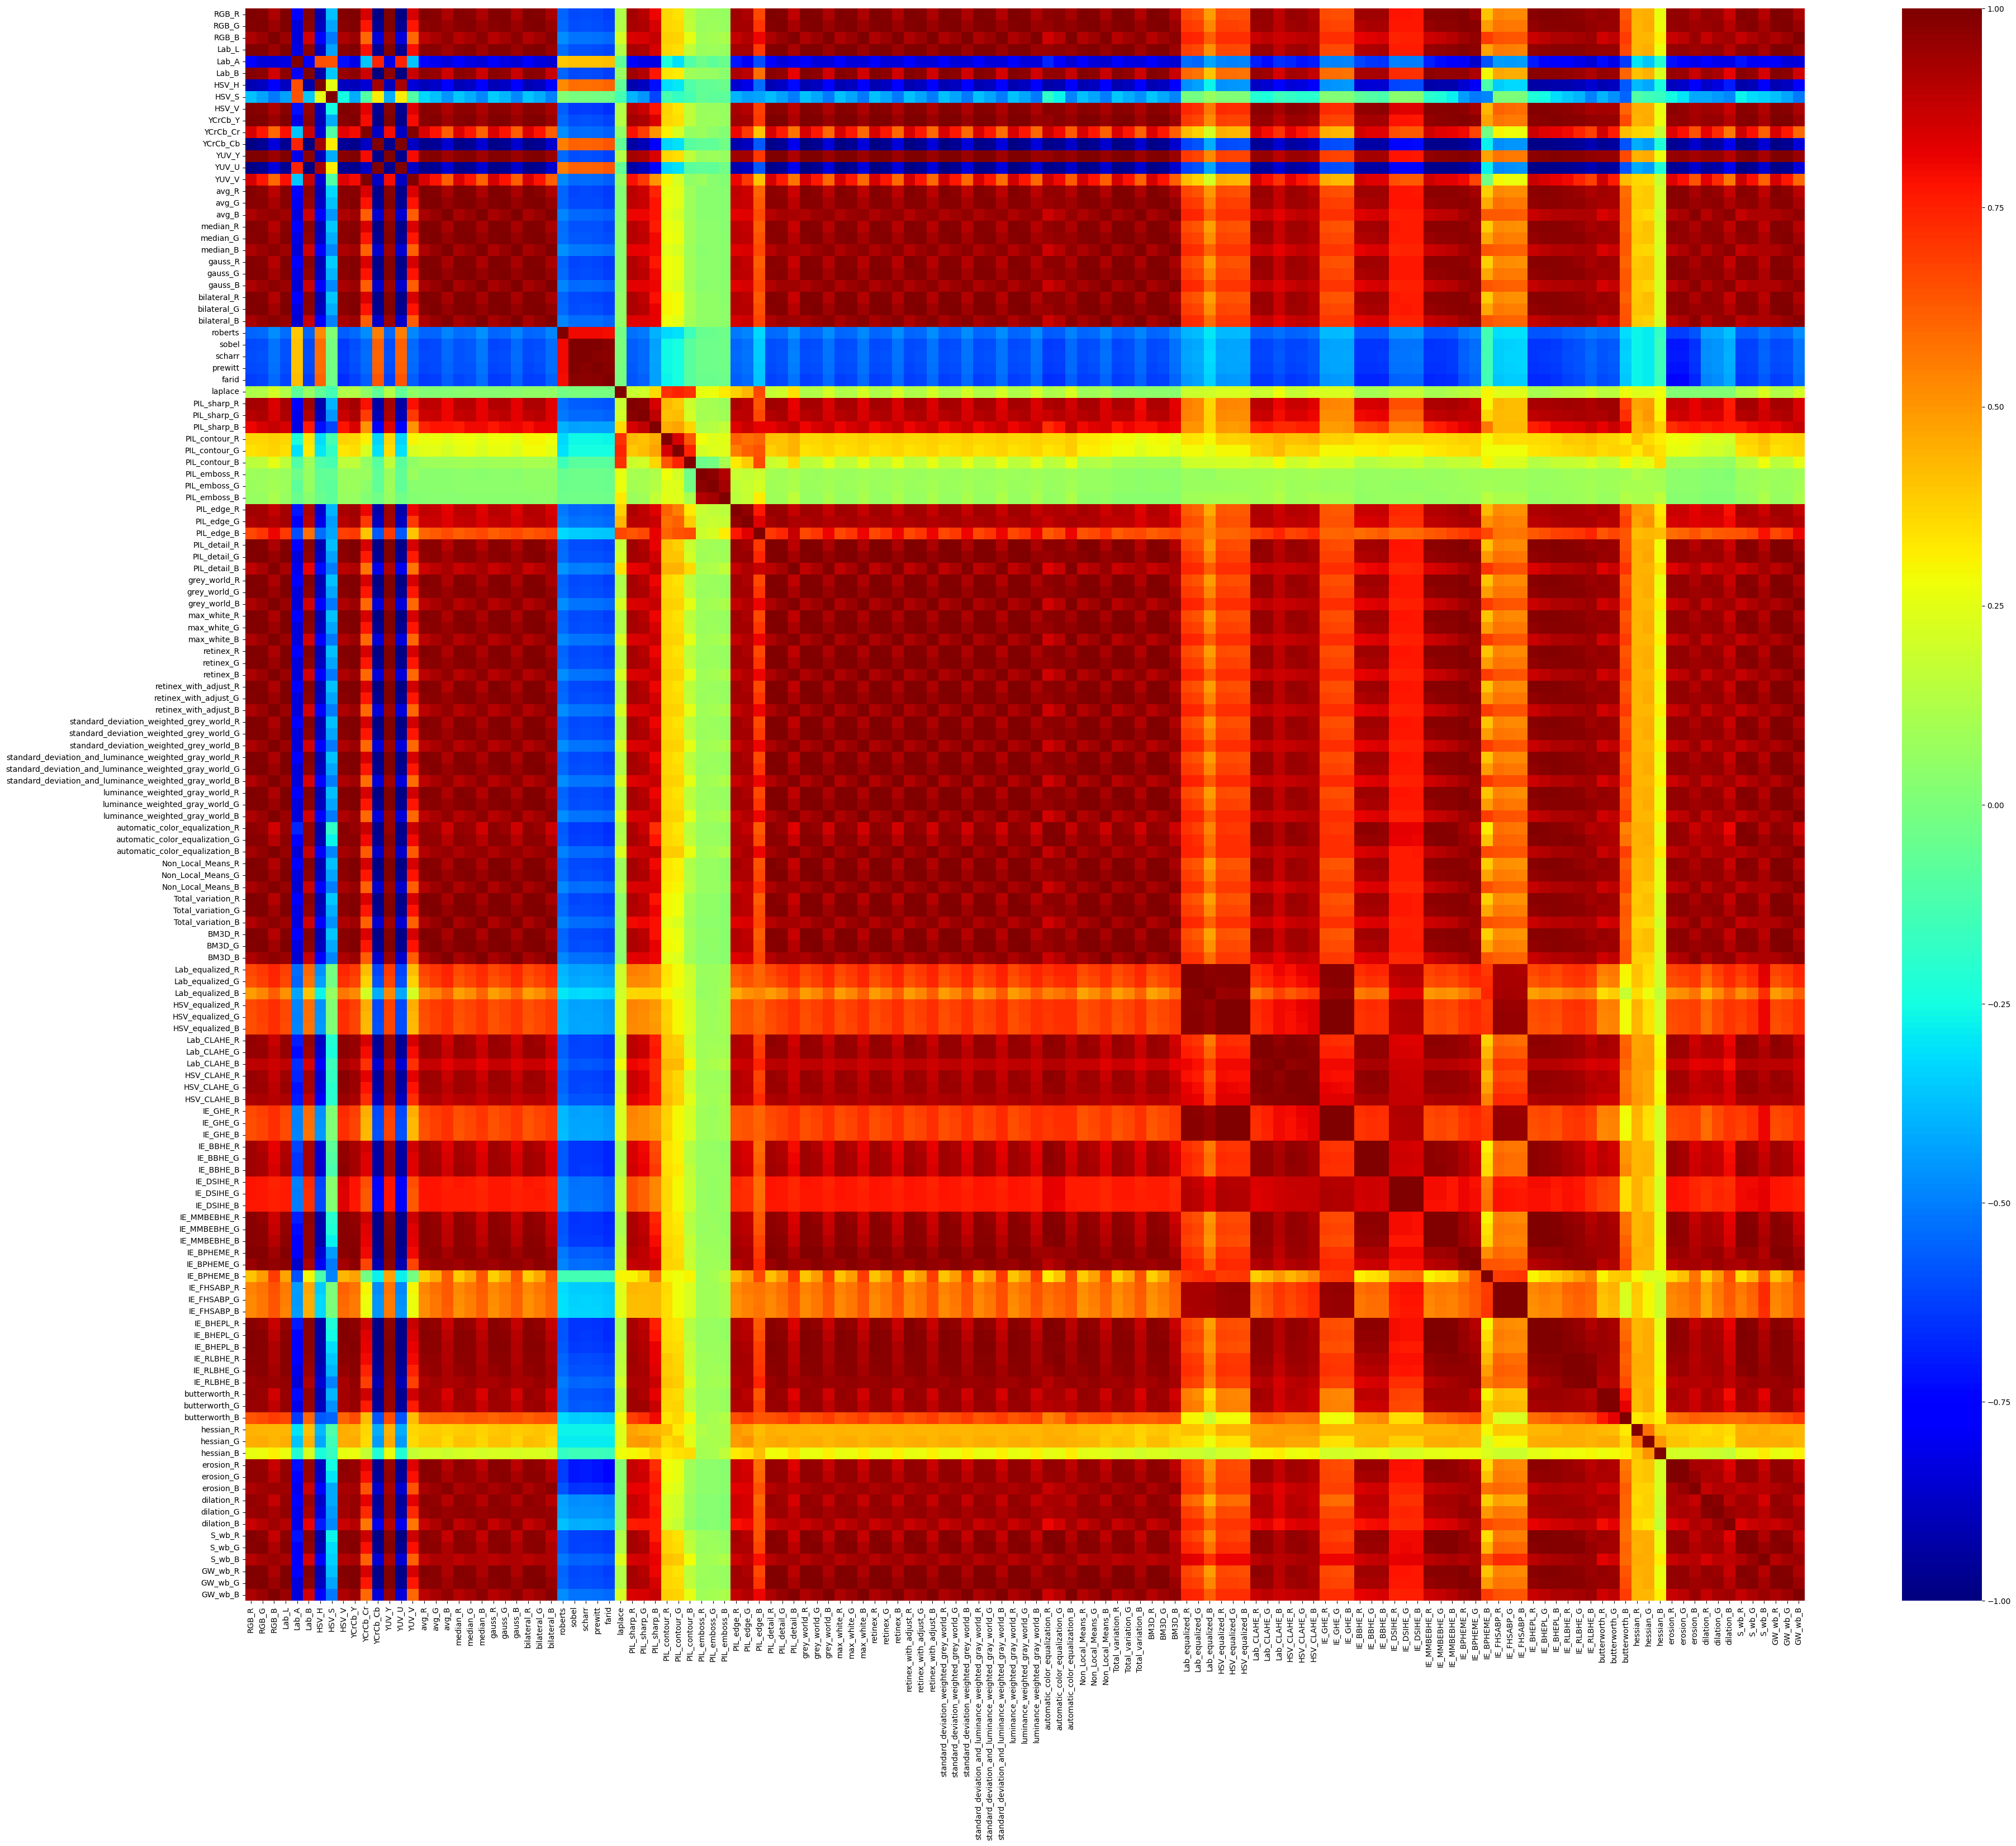

In [7]:
fig = plt.figure(figsize = (45, 37))
sns.heatmap(X.corr(),vmin=-1,vmax=1,cmap='jet',cbar=True)
plt.show()

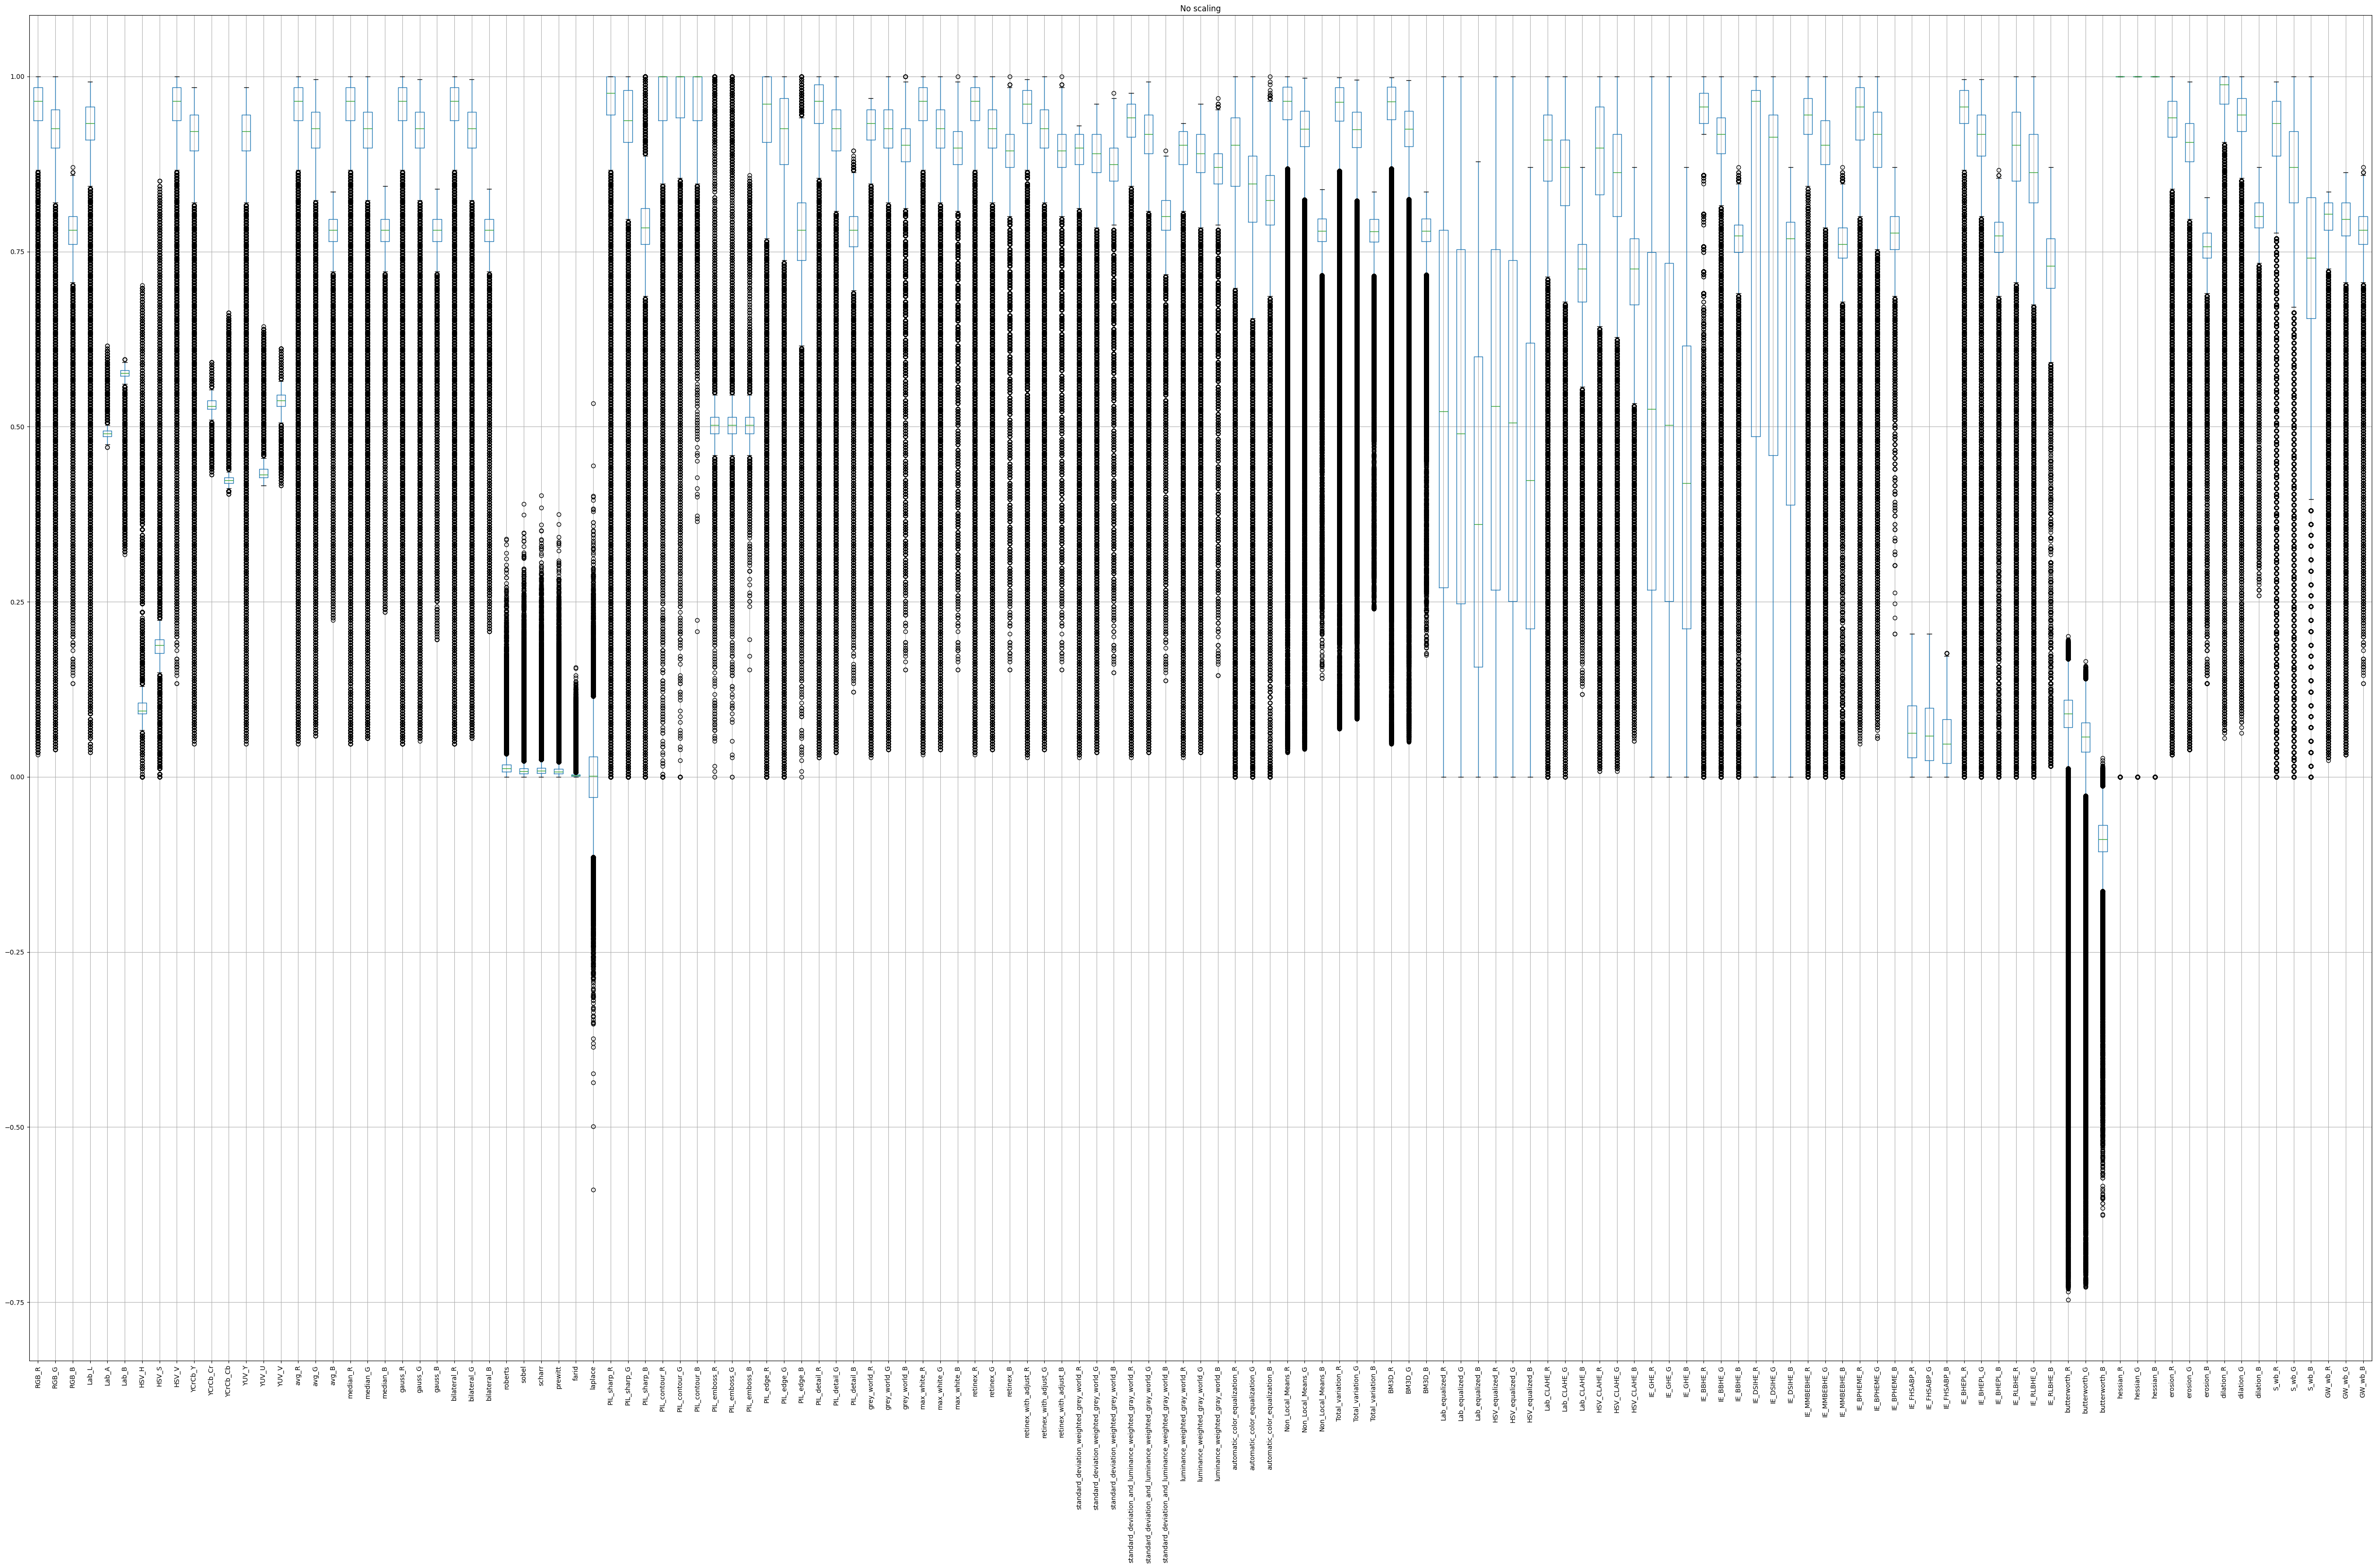

In [8]:
fig = plt.figure(figsize = (64, 37))
X.boxplot()
plt.xticks(rotation = 90)
plt.show()